In [197]:
import pandas as pd
import plotly.express as px
#recebimento e exclusão de dados irrelevantes para a analise da base pib
base_pib = pd.read_csv('pib_uf_antigo.csv')
base_pib = base_pib.drop(['impostos_liquidos','va',	'va_agropecuaria',	'va_industria',	'va_servicos','va_adespss'],axis = 1) #remove colunas não utilizadas
remove_anos = base_pib.loc[base_pib['ano'] < 2007] #remove os anos que não serão utilizados

base_pib = base_pib.drop(remove_anos.index, axis = 0)
# display(base_pib)

In [198]:

#dicionário com a relação Sigla - id IBGE usadas como identificador cada qual em cada base de dados
d = {'AC' : 12, 'AL' :  27, 'AP' :  16,'AM' :  13, 'BA' :  29, 'CE' :  23, 'DF' :  53,
'ES' :  32, 'GO' :  52, 'MA' :  21, 'MT' :  51, 'MS':  50, 'MG':  31, 'PA':  15, 'PB': 25,
'PR':  41, 'PE' :  26, 'PI' :  22, 'RN' :  24, 'RS' :  43, 'RJ' :  33, 'RO' :  11, 'RR' :  14,
'SC' :  42, 'SP' :  35, 'SE':  28,'TO' :  17}

#inclui a coluna sigla na base do pib para que podemos fundi-las futuramente
for sigla, id in list(d.items()):
    #o código abaixo significa basicamente pegue todas as linhas com o id informado e crie uma coluna chamada 'sigla_uf' anexando a sigla informada
    base_pib.loc[base_pib['id_uf'] == id , "sigla_uf"] = sigla

# base_pib.loc[base_pib['id_uf'] == 35 , "sigla_uf"] = "SP" (exemplo em execução do código)

# display(base_pib) #verificar a existencia da nova coluna com as informações das siglas nos lugares corrertos


In [199]:
##recebimento e exclusão de dados irrelevantes para a analise da base indices educacionais

base_ind_educ = pd.read_csv('indicadores_educ_uf.csv')

base_ind_educ = base_ind_educ.loc[:,['ano','sigla_uf','localizacao','rede','taxa_aprovacao_ef','taxa_aprovacao_em','taxa_reprovacao_ef','taxa_reprovacao_em','taxa_abandono_ef' ,'taxa_abandono_em']]

remove_anos = base_ind_educ.loc[base_ind_educ['ano'] < 2007]
base_ind_educ = base_ind_educ.drop(remove_anos.index, axis = 0)

remove_anos = base_ind_educ.loc[base_ind_educ['ano'] > 2012]
base_ind_educ = base_ind_educ.drop(remove_anos.index, axis = 0)

remove_atributo = base_ind_educ.loc[base_ind_educ['rede'] != 'total']
base_ind_educ = base_ind_educ.drop(remove_atributo.index, axis = 0)

remove_atributo = base_ind_educ.loc[base_ind_educ['localizacao'] != 'total']
base_ind_educ = base_ind_educ.drop(remove_atributo.index, axis = 0)



# display(base_ind_educ)


In [200]:
#mesclando as duas tabelas pois contêm os atributos de sigla e ano como referências para união das informações

df_final = base_pib.merge(base_ind_educ)

# display(df_final)

In [201]:
#criar coluna de média anual dos estdos
#obs: linhas que possuem o mesmo ano e estado receberão o mesmo valor de media anual pois se trata da média no periodo (2007 - 2012)

#media de pib
for estado in df_final["sigla_uf"]:

    pib_estado_media = df_final.loc[df_final["sigla_uf"] == estado, "pib"].mean()

    df_final.loc[df_final["sigla_uf"] == estado, 'media_pib_ano'] = pib_estado_media
    
# display(df_final)

#media de aprovação ensino fundamental
for estado in df_final["sigla_uf"]:

    tx_ap_ef_estado_media = df_final.loc[df_final["sigla_uf"] == estado, "taxa_aprovacao_ef"].mean()

    df_final.loc[df_final["sigla_uf"] == estado, 'media_tx_ap_ef'] = tx_ap_ef_estado_media
# display(df_final.head(20))

#media aprovação ensino médio
for estado in df_final["sigla_uf"]:

    tx_ap_em_estado_media = df_final.loc[df_final["sigla_uf"] == estado, "taxa_aprovacao_em"].mean()

    df_final.loc[df_final["sigla_uf"] == estado, 'media_tx_ap_em'] = tx_ap_em_estado_media

# display(df_final)

In [202]:
#criar linha das médias anuais

#cria um dicionario com o objetivo de virar um dataframe para inclusão no df_final - o dicionario precisa ter todos os campos do df_final
d = {'id_uf': [] ,'sigla_uf':[], 'ano':[], 'pib':[], 'localizacao': [],'rede': [],'taxa_aprovacao_ef':[]	,'taxa_aprovacao_em':[]	,
     'taxa_reprovacao_ef':[]	,'taxa_reprovacao_em':[]	,'taxa_abandono_ef':[]	,'taxa_abandono_em':[],'media_pib_ano':[]	,'media_tx_ap_ef':	[],
     'media_tx_ap_em':[]}

#loop para cada ano 
for ano in range(2007,2012 + 1):

    #captura todas as linhas que sejam do ano e pega a coluna de todos os pibs daquele ano e faz a média
    media_ano_pib = df_final.loc[df_final['ano'] == ano]['pib'].mean()

    #captura todas as linhas que sejam do ano e pega a coluna de todas as taxas de aprovações de ensino fundamental daquele ano e faz a média
    media_ano_tx_ap_ef = df_final.loc[df_final['ano'] == ano]['taxa_aprovacao_ef'].mean()
    #captura todas as linhas que sejam do ano e pega a coluna de todas as taxas de aprovações de ensino fundamental daquele ano e faz a média
    media_ano_tx_ap_em = df_final.loc[df_final['ano'] == ano]['taxa_aprovacao_em'].mean()

    #captura todas as linhas que sejam do ano e pega a coluna de todas as taxas de reprovações de ensino fundamental daquele ano e faz a média
    media_ano_tx_rp_em = df_final.loc[df_final['ano'] == ano]['taxa_reprovacao_em'].mean()
    #captura todas as linhas que sejam do ano e pega a coluna de todas as taxas de reprovações de ensino medio daquele ano e faz a média
    media_ano_tx_rp_ef = df_final.loc[df_final['ano'] == ano]['taxa_reprovacao_ef'].mean()

    #captura todas as linhas que sejam do ano e pega a coluna de todas as taxas de abandono de ensino fundamental daquele ano e faz a média
    media_ano_tx_ab_ef = df_final.loc[df_final['ano'] == ano]['taxa_abandono_ef'].mean()
    #captura todas as linhas que sejam do ano e pega a coluna de todas as taxas de abandono de ensino medio daquele ano e faz a média
    media_ano_tx_ab_em = df_final.loc[df_final['ano'] == ano]['taxa_abandono_em'].mean()

    #captura todas as linhas que sejam do ano e pega a coluna de todas as medias anuais de pib do périodo (2007 - 2012) ano e faz a média
    #embora sejam todas iguais em cada ano
    media_media_pib = df_final.loc[df_final['ano'] == ano]['media_pib_ano'].mean()
    
    #captura todas as linhas que sejam do ano e pega a coluna de todas as medias anuais de aprovaçao ensino fundamental do périodo (2007 - 2012) ano e faz a média
    #embora sejam todas iguais em cada ano
    media_media_tx_ap_ef = df_final.loc[df_final['ano'] == ano]['media_tx_ap_ef'].mean()

    #captura todas as linhas que sejam do ano e pega a coluna de todas as medias anuais de aprovação ensino médio do périodo (2007 - 2012) ano e faz a média
    #embora sejam todas iguais em cada ano
    media_media_tx_ap_em = df_final.loc[df_final['ano'] == ano]['media_tx_ap_em'].mean()

    

    #insere os dados no dicionario para virar uma linha do dataFrame
    #obs.: uma linha para cada ano
    d['id_uf'].append(00)
    d['sigla_uf'].append('media')
    d['localizacao'].append('total') 
    d['rede'].append('total')
    
    d['ano'].append(ano)
    d['pib'].append(media_ano_pib)
    d['taxa_aprovacao_ef'].append(media_ano_tx_ap_ef)
    d['taxa_aprovacao_em'].append(media_ano_tx_ap_em)
    
    d['taxa_reprovacao_em'].append(media_ano_tx_rp_ef)
    d['taxa_reprovacao_ef'].append(media_ano_tx_rp_em)
    
    
    d['taxa_abandono_ef'].append(media_ano_tx_ab_ef)
    d['taxa_abandono_em'].append(media_ano_tx_ab_em)
    
    
    d['media_pib_ano'].append(media_media_pib )
    d['media_tx_ap_ef'].append(media_media_tx_ap_ef)
    d['media_tx_ap_em'].append( media_media_tx_ap_em)
    
#ao final do loop o dicionario estará preenchido com 6 linhas referente aos 6 anos (2007 - 2012)
#podendo virar um dataFrame
d_media = pd.DataFrame(d)


#incorpora linhas com as médias do pib, aprovação,reprovação,abandono,media anual do pib estado,media anual aprovação do ensino fundamental e medio por estado 

df_final = pd.concat([df_final,d_media], axis = 0,ignore_index = True) #append não funcionava pois foi descontinuado
# display(d_media.round(1))
# display(df_final)


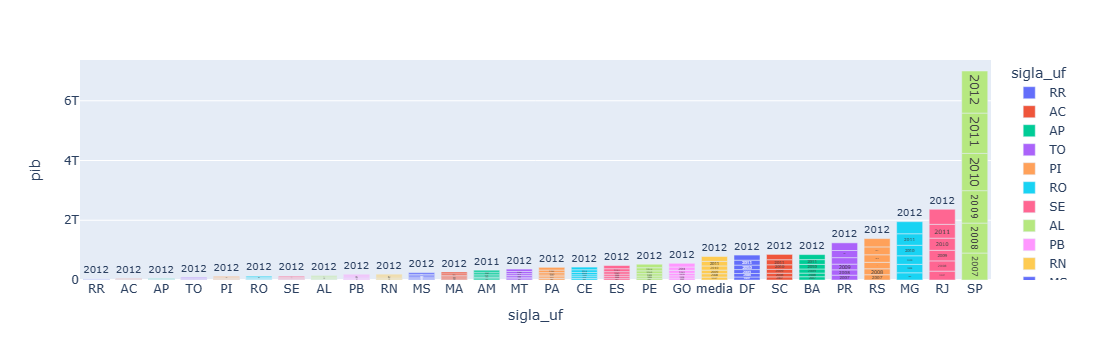

In [203]:
#grafico que mostra o pib anualmente empilhado dos estados
#obs: a situação crescente do grafico se baseia apenas no pib do primeiro ano (2007)


#grafico gerado pela base df_final que esta ordenada pelo pib, eixo y será o pib, eixo x os estados e os anos serão informados nas barras
graf_pib = px.bar(df_final.sort_values("pib"),y='pib' ,x ='sigla_uf',color = 'sigla_uf',text='ano')
graf_pib.show()

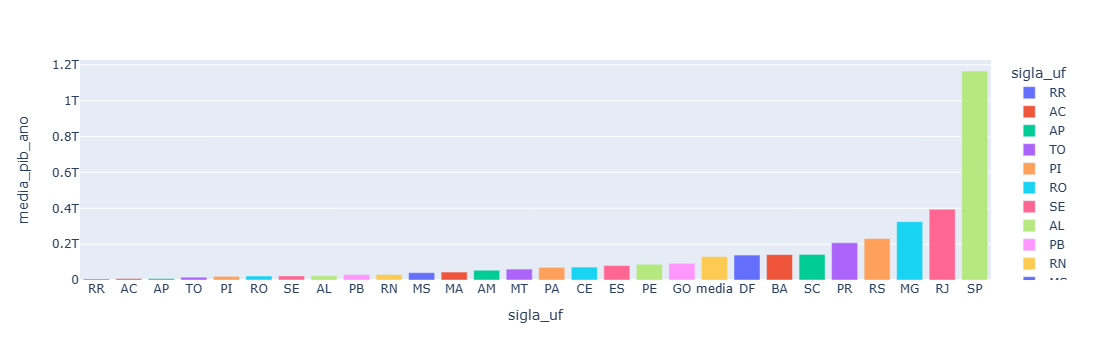

In [204]:
#grafico que mmostra a média anual do pib no periodo (2007 - 2012)

#como a média anual do periodo é a mesma em todos os anos, fiz uma filtragem na tabela para não deixar o grafico pontilhado
ano = df_final.loc[df_final["ano"] == 2012]

#grafico gerado pela base df_final que esta ordenada pela media anual do pib, eixo y será o pib, eixo x serão os estados 
graf_pib = px.bar(ano.sort_values('media_pib_ano'),y='media_pib_ano' ,x ='sigla_uf',color = 'sigla_uf')
graf_pib.show()

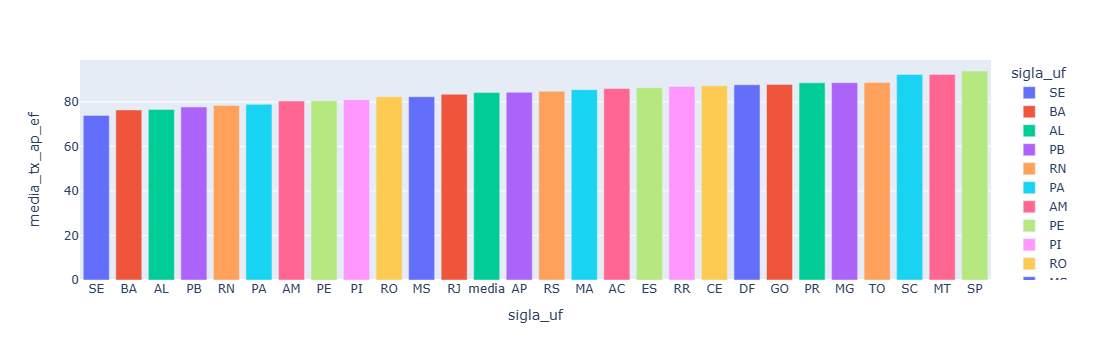

In [205]:
#grafico que mostra a taxa de aprovação no ensino fundamental média anual do periodo (2007 - 2012)

#como a média anual do periodo é a mesma em todos os anos, fiz uma filtragem na tabela para não deixar o grafico pontilhado
ano = df_final.loc[df_final["ano"] == 2012]

#grafico gerado pela base df_final que esta ordenada pela media anual da taxa de aprovacão no ensino fundamental,
# eixo y será o a aprovação, eixo x os estados
graf_pib = px.bar(ano.sort_values("media_tx_ap_ef"),y='media_tx_ap_ef' ,x ='sigla_uf',color = 'sigla_uf')
graf_pib.show()

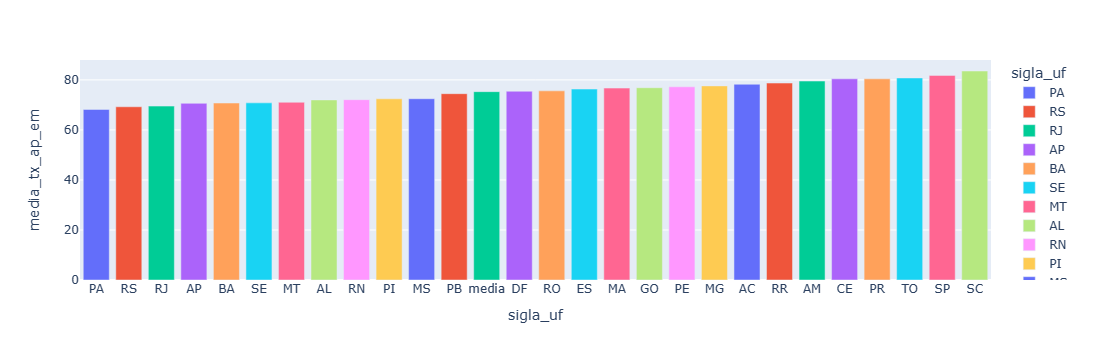

In [206]:
#grafico que mostra a taxa de aprovação no ensino médio média anual do periodo (2007 - 2012)

#como a média anual do periodo é a mesma em todos os anos, fiz uma filtragem na tabela para não deixar o grafico pontilhado
ano = df_final.loc[df_final["ano"] == 2012]

#grafico gerado pela base df_final que esta ordenada pela media anual da taxa de aprovacão no ensino medio,
# eixo y será o a aprovação, eixo x os estados
graf_pib = px.bar(ano.sort_values("media_tx_ap_em"),y='media_tx_ap_em' ,x ='sigla_uf',color = 'sigla_uf')
graf_pib.show()